In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

TO DO:

* move most of this to the libraries
* order groups reliably by time
  * in data
  * in plot
* summarize groups
* entity resolution on participants
* convolve the time series with a declining 'response time'

In [2]:
%matplotlib inline

Resources for this:

http://sociograph.blogspot.com/2012/11/visualizing-adjacency-matrices-in-python.html  !!!

http://www.fil.ion.ucl.ac.uk/~wpenny/course/array.pdf

http://stats.stackexchange.com/questions/29096/correlation-between-two-time-series

http://perso.crans.org/aynaud/communities/api.html

In [3]:
from bigbang.archive import Archive

arx = Archive("scipy-dev",archive_dir="../archives")

Get the activity of a list

In [4]:
act = arx.get_activity(resolved=True)

In [5]:
#act.shape

Since are going to be computing correlations between N different time series data sets and that's an $O(N^2)$ operation, let's limit N.

In [6]:
cutoff = 5

def filtered_participants(cutoff):
    xc = act.sum() > cutoff
    return act.columns[xc]

filtered_participants(cutoff)[:10]

Index([u'dwf@cs.toronto.... (David Warde-Farley)', u'alan@ajackson.... (Alan Jackson)', u'aahz@pythoncraft.... (Aahz)', u'deshpande.jaidev@gmail.... (Jaidev Deshpande)', u'Brian.Newsom@Colorado.... (Brian Lee Newsom)', u'pierre.haessig@crans.... (Pierre Haessig)', u'lists at UltimateG.com (Mark Evans)', u'travis at enthought.com (Travis N. Vaught)', u'cohen@slac.stanford.... (Johann Cohen-Tanugi)', u'deil.christoph@googlemail.... (Christoph Deil)'], dtype='object')

In [7]:
from scipy.stats.stats import pearsonr  

fc = filtered_participants(cutoff)

n = len(fc)

pc = np.zeros([n,n])

for i in range(0,n):
    for j in range(i,n):
        # since pearson correlation assumes normally distributed data
        # and we believe activity to be log-normally distributed (see Shalizi...)
        # we'll take the log of values here
        si = np.log1p(act[fc[i]])
        sj = np.log1p(act[fc[j]])

        c = pearsonr(si,sj)[0]
        pc[i,j] = c
        pc[j,i] = c
        
pc

array([[  1.00000000e+00,  -2.18586193e-03,  -1.23054378e-03, ...,
         -1.80003797e-03,  -1.73147672e-03,  -1.02179072e-03],
       [ -2.18586193e-03,   1.00000000e+00,  -1.29219562e-03, ...,
         -1.89022221e-03,  -1.81822596e-03,  -1.07298377e-03],
       [ -1.23054378e-03,  -1.29219562e-03,   1.00000000e+00, ...,
         -1.06411167e-03,  -1.02358095e-03,  -6.04042496e-04],
       ..., 
       [ -1.80003797e-03,  -1.89022221e-03,  -1.06411167e-03, ...,
          1.00000000e+00,  -1.49729300e-03,  -8.83592643e-04],
       [ -1.73147672e-03,  -1.81822596e-03,  -1.02358095e-03, ...,
         -1.49729300e-03,   1.00000000e+00,  -8.49937677e-04],
       [ -1.02179072e-03,  -1.07298377e-03,  -6.04042496e-04, ...,
         -8.83592643e-04,  -8.49937677e-04,   1.00000000e+00]])

In [8]:
G = nx.Graph(pc)
labels = dict(enumerate(fc))
G = nx.relabel_nodes(G,labels)

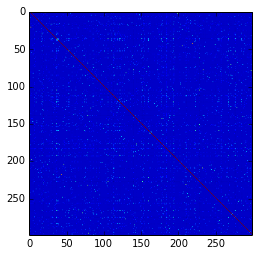

In [9]:
plt.imshow(pc)

In [10]:
from bigbang import plot

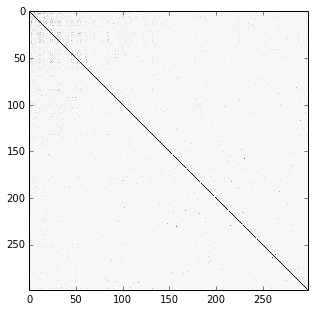

In [11]:
# order nodes by number of messages sent by each participant
o = list(act[fc].sum().order(ascending=False).keys())
plot.draw_adjacency_matrix(G,node_order=o)

In [12]:
from sklearn import cluster

n_clusters = 3
sc = cluster.SpectralClustering(n_clusters=n_clusters)
partition = sc.fit_predict(pc)
partition_order = [fc[x] for x in np.argsort(partition)]

/home/sb/anaconda/envs/bigbang/lib/python2.7/site-packages/sklearn/cluster/spectral.py:421: UserWarning: The spectral clustering API has changed. ``fit``now constructs an affinity matrix from data. To use a custom affinity matrix, set ``affinity=precomputed``.
  warnings.warn("The spectral clustering API has changed. ``fit``"


In [13]:
np.sort(partition)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int32

In [14]:
from collections import defaultdict

parts = defaultdict(list)
for i in range(len(partition)):
    parts[partition[i]].append(fc[i])
    
colors = [plt.cm.hsv(float(k) / len(parts)) for k in range(len(parts))]

In [15]:
colors

[(1.0, 0.0, 0.0, 1.0),
 (0.03124934374934376, 1.0, 1.3125013124790507e-06, 1.0),
 (0.0, 0.062501968751969006, 1.0, 1.0)]

In [16]:
len(parts.values())

3

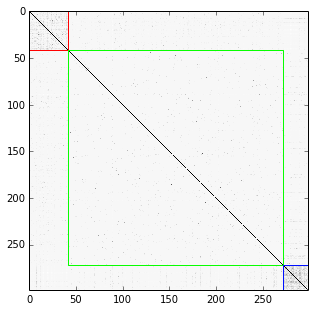

In [17]:
plot.draw_adjacency_matrix(G,
                          node_order=partition_order,
                          partitions=parts.values(),
                          colors=colors)

In [18]:
for k,v in parts.items():
    print str(k) + ": " + str(len(v))

0: 42
1: 230
2: 27


In [19]:
node_parts = {}

for k,v in parts.items():
    for n in v:
        node_parts[n] = int(k)

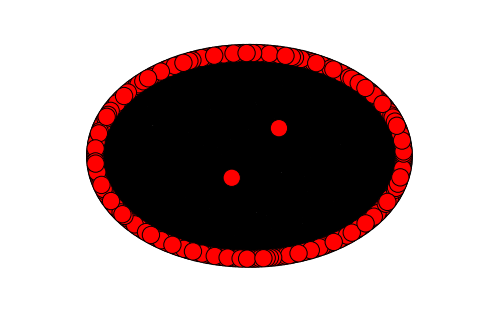

In [20]:
import networkx as nx

#FG = nx.Graph(pc > .01)
FG = nx.from_numpy_matrix(pc * (pc > 0))

labels = dict(enumerate(fc))
FG = nx.relabel_nodes(FG,labels)
nx.set_node_attributes(FG,'corr-cluster',node_parts)


pos = nx.spring_layout(FG, k = 0.6, iterations = 1000)
nx.draw(FG,pos)
nx.write_gexf(FG,'corr.gexf')

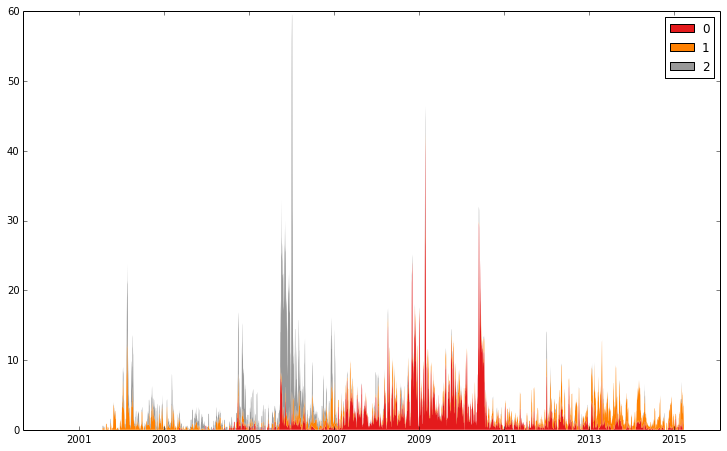

In [21]:
from bigbang import plot

plot.stack(act,partition=parts,smooth=7)